#  Independent Component Analysis (ICA)

We will use the MNIST (Modified National Institute of Standards and Technology) database (http://yann.lecun.com/exdb/mnist/) of handwritten digits. It is a subset of a larger set available from NIST. 

Each digit has 64 pixels (8 by 8). Each pixel can be used as a predictor variable, and the number written can be used as the target variable.


## Import libraries

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm, kurtosis # to install scipy, search 'scipy anaconda'
from sklearn.decomposition import FastICA
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import *
%matplotlib inline


## Load the data



In [2]:
from sklearn.datasets import load_digits # built-in data
digits = load_digits()
digits.data.shape # show the dimension 

(1797, 64)

In [3]:
# create the dataset with labels (y-variable, the written number in this case) and features (64 x-variables)
# label: digit
# 64 pixels -> 64 variables 
features = pd.DataFrame(digits.data)
labels = pd.DataFrame(digits.target, columns=['label'])
data = pd.concat([labels, features], axis=1)
data

,label,0,1,2,3,4,5,6,7,8,...,54,55,56,57,58,59,60,61,62,63
0,0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,9,0.0,0.0,4.0,10.0,13.0,6.0,0.0,0.0,0.0,...,4.0,0.0,0.0,0.0,2.0,14.0,15.0,9.0,0.0,0.0
1793,0,0.0,0.0,6.0,16.0,13.0,11.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,6.0,16.0,14.0,6.0,0.0,0.0
1794,8,0.0,0.0,1.0,11.0,15.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,9.0,13.0,6.0,0.0,0.0
1795,9,0.0,0.0,2.0,10.0,7.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,0.0,5.0,12.0,16.0,12.0,0.0,0.0


## ICA: Choose the number of components

components: 1 , kurtosis: 0.6397539703758661
components: 2 , kurtosis: 0.9976677810305153
components: 3 , kurtosis: 1.0055249287523698
components: 4 , kurtosis: 0.9848478765430393
components: 5 , kurtosis: 0.8970730011721446
components: 6 , kurtosis: 0.6735963076324131
components: 7 , kurtosis: 0.7204980265460057
components: 8 , kurtosis: 0.7181155459860904
components: 9 , kurtosis: 0.7916792189882442
components: 10 , kurtosis: 0.9338209029807768
components: 11 , kurtosis: 0.9721227754729281
components: 12 , kurtosis: 0.9350263460211132
components: 13 , kurtosis: 0.9611478254787278
components: 14 , kurtosis: 0.8989639447135794
components: 15 , kurtosis: 0.9571820234337725
components: 16 , kurtosis: 0.9451497359338802
components: 17 , kurtosis: 0.9899850778757546
components: 18 , kurtosis: 1.1246482742503703


C:\Users\andyc\anaconda3\Lib\site-packages\sklearn\decomposition\_fastica.py:128: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(


components: 19 , kurtosis: 1.3446833355482755
components: 20 , kurtosis: 1.3918681607337438
components: 21 , kurtosis: 1.6592260492215354
components: 22 , kurtosis: 1.7191641892222789


C:\Users\andyc\anaconda3\Lib\site-packages\sklearn\decomposition\_fastica.py:128: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(


components: 23 , kurtosis: 1.877019169865376


C:\Users\andyc\anaconda3\Lib\site-packages\sklearn\decomposition\_fastica.py:128: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(


components: 24 , kurtosis: 1.9832266788231319
components: 25 , kurtosis: 2.199746680318671


C:\Users\andyc\anaconda3\Lib\site-packages\sklearn\decomposition\_fastica.py:128: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(


components: 26 , kurtosis: 2.134883267950715


C:\Users\andyc\anaconda3\Lib\site-packages\sklearn\decomposition\_fastica.py:128: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(


components: 27 , kurtosis: 2.3415477138748133
components: 28 , kurtosis: 2.4936315902079484
components: 29 , kurtosis: 2.60325881177056
components: 30 , kurtosis: 2.6560276672835674
components: 31 , kurtosis: 2.751848885676484
components: 32 , kurtosis: 2.660313944816486
components: 33 , kurtosis: 2.8312108996506806
components: 34 , kurtosis: 2.870453588579137
components: 35 , kurtosis: 2.9558187866055916
components: 36 , kurtosis: 3.1230935788009
components: 37 , kurtosis: 3.222642096108579
components: 38 , kurtosis: 3.2374972149327563
components: 39 , kurtosis: 3.3277349498040176
components: 40 , kurtosis: 3.3177992755610624
components: 41 , kurtosis: 3.486985373556309
components: 42 , kurtosis: 3.7285643052135393
components: 43 , kurtosis: 3.851630994871587
components: 44 , kurtosis: 3.904441411986767
components: 45 , kurtosis: 4.105439677066277
components: 46 , kurtosis: 4.322755100236617
components: 47 , kurtosis: 4.818046127843163
components: 48 , kurtosis: 6.682653744782418
comp

C:\Users\andyc\anaconda3\Lib\site-packages\sklearn\decomposition\_fastica.py:128: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(


components: 62 , kurtosis: 115.13422267664954


C:\Users\andyc\anaconda3\Lib\site-packages\sklearn\decomposition\_fastica.py:128: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(


components: 63 , kurtosis: 112.91844643937031


C:\Users\andyc\anaconda3\Lib\site-packages\sklearn\decomposition\_fastica.py:128: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(


components: 64 , kurtosis: 1.2200853308279784


Text(0.5, 1.0, 'Kurtosis vs. # of Independent Components')

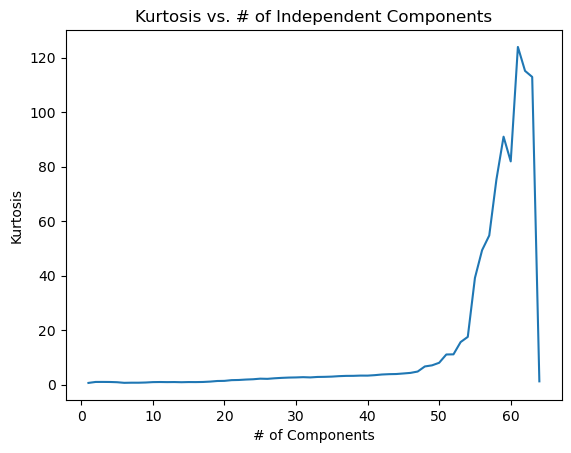

In [4]:
# extrac x and y vars 
X = data.iloc[:,1:] 
y = data.iloc[:,0] 

components = list(range(1, features.shape[1]+1))
kurtosis = []

for i in range(1, X.shape[1]+1): 
    
    # define ICA
    ica = FastICA(n_components = i, max_iter = 5000, random_state = 101)
    
    # fit ICA to data 
    ica.fit(X)
    
    # transform x-vars using ind components
    projected_variables = ica.transform(X)
    projected_variables = pd.DataFrame(projected_variables)
    
    # calc. mean absolute value of kurtosis for the components
    k = projected_variables.kurt(axis = 0).abs().mean()
    kurtosis.append(k)
    
    # using kurtosis is good if your goal is to find # of independent components rather than making predictions
    print('components:', i, ', kurtosis:', k)
    
plt.plot(components, kurtosis)
plt.ylabel('Kurtosis')
plt.xlabel('# of Components')
plt.title('Kurtosis vs. # of Independent Components')


## ICA: Reduce dimensionality and calculate new values based on independent components

In [5]:
X = data.iloc[:,1:] 
y = data.iloc[:,0] 

# define ICA 
ica = FastICA(5, random_state = 101) # choose # of components  

# fit ICA to data
ica.fit(X) 

# transform x-vars using ind components
projected = ica.transform(X) 
projected_variables = pd.DataFrame(projected)
data2 = pd.concat([labels, projected_variables], axis=1)
data2.head()


,label,0,1,2,3,4
0,0,-0.839431,-0.240368,0.736439,-1.631208,-1.503182
1,1,0.368961,0.373445,-0.959171,1.735588,1.560236
2,2,-1.625606,-1.768190,1.254982,0.866418,1.179222
3,3,1.355657,0.189443,0.175671,-0.580742,-0.558266
4,4,-1.373232,0.909662,-1.122131,0.181869,-0.067447


In [6]:
print(data.iloc[:,1:].shape)
print(data2.iloc[:,1:].shape) 

(1797, 64)
(1797, 5)


## Make predictions with ICA components

components: 1 , accuracy: 0.34444444444444444
components: 2 , accuracy: 0.6166666666666667
components: 3 , accuracy: 0.6185185185185185
components: 4 , accuracy: 0.6148148148148148
components: 5 , accuracy: 0.7314814814814815
components: 6 , accuracy: 0.7574074074074074
components: 7 , accuracy: 0.7962962962962963
components: 8 , accuracy: 0.8111111111111111
components: 9 , accuracy: 0.8555555555555555
components: 10 , accuracy: 0.8555555555555555
components: 11 , accuracy: 0.8796296296296297
components: 12 , accuracy: 0.8851851851851852
components: 13 , accuracy: 0.8962962962962963
components: 14 , accuracy: 0.9111111111111111
components: 15 , accuracy: 0.912962962962963
components: 16 , accuracy: 0.9185185185185185
components: 17 , accuracy: 0.9185185185185185
components: 18 , accuracy: 0.9185185185185185


C:\Users\andyc\anaconda3\Lib\site-packages\sklearn\decomposition\_fastica.py:128: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(


components: 19 , accuracy: 0.9166666666666666
components: 20 , accuracy: 0.9333333333333333
components: 21 , accuracy: 0.937037037037037
components: 22 , accuracy: 0.937037037037037


C:\Users\andyc\anaconda3\Lib\site-packages\sklearn\decomposition\_fastica.py:128: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(


components: 23 , accuracy: 0.9388888888888889
components: 24 , accuracy: 0.9425925925925925
components: 25 , accuracy: 0.9388888888888889


C:\Users\andyc\anaconda3\Lib\site-packages\sklearn\decomposition\_fastica.py:128: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(


components: 26 , accuracy: 0.9481481481481482


C:\Users\andyc\anaconda3\Lib\site-packages\sklearn\decomposition\_fastica.py:128: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(


components: 27 , accuracy: 0.9444444444444444
components: 28 , accuracy: 0.9407407407407408
components: 29 , accuracy: 0.9425925925925925
components: 30 , accuracy: 0.9425925925925925
components: 31 , accuracy: 0.9388888888888889
components: 32 , accuracy: 0.9388888888888889
components: 33 , accuracy: 0.9407407407407408
components: 34 , accuracy: 0.9407407407407408
components: 35 , accuracy: 0.9444444444444444
components: 36 , accuracy: 0.9444444444444444
components: 37 , accuracy: 0.9407407407407408
components: 38 , accuracy: 0.9388888888888889
components: 39 , accuracy: 0.9425925925925925
components: 40 , accuracy: 0.9407407407407408
components: 41 , accuracy: 0.9425925925925925
components: 42 , accuracy: 0.9481481481481482
components: 43 , accuracy: 0.9481481481481482
components: 44 , accuracy: 0.9462962962962963
components: 45 , accuracy: 0.9444444444444444
components: 46 , accuracy: 0.9425925925925925
components: 47 , accuracy: 0.9407407407407408
components: 48 , accuracy: 0.94074

C:\Users\andyc\anaconda3\Lib\site-packages\sklearn\decomposition\_fastica.py:128: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(


components: 62 , accuracy: 0.9537037037037037


C:\Users\andyc\anaconda3\Lib\site-packages\sklearn\decomposition\_fastica.py:128: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(


components: 63 , accuracy: 0.9574074074074074


C:\Users\andyc\anaconda3\Lib\site-packages\sklearn\decomposition\_fastica.py:128: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(


components: 64 , accuracy: 0.9462962962962963


Text(0.5, 1.0, 'Accuracy vs. # of Independent Components')

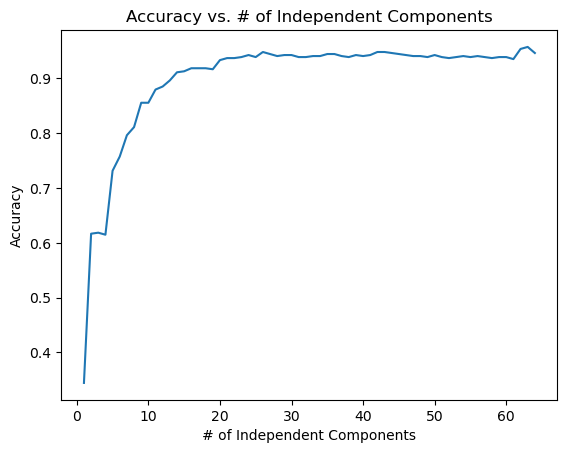

In [7]:
X = data.iloc[:,1:]
y = data.iloc[:,0]

accuracies = []
components = list(range(1, X.shape[1]+1)) # 1 to 64 components

for i in range(1, X.shape[1]+1): 
    
    ica = FastICA(n_components = i, max_iter = 10000, random_state = 101) 

    ica.fit(X)
    
    projected = ica.transform(X)
    projected_variables = pd.DataFrame(projected)
    data2 = pd.concat([labels, projected_variables], axis=1)
    
    X2 = data2.iloc[:,1:]
    y2 = data2.iloc[:,0]
    
    X_train, X_test, y_train, y_test = train_test_split(X2, y2, test_size=0.3, random_state = 101)
    
    model = LogisticRegression(solver = 'lbfgs', multi_class = 'multinomial', max_iter = 5000)
    
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)

    accuracies.append(acc)
    
    print('components:', i, ', accuracy:', acc)

plt.plot(components, accuracies)
plt.ylabel('Accuracy')
plt.xlabel('# of Independent Components')
plt.title('Accuracy vs. # of Independent Components')
